<a href="https://colab.research.google.com/github/mannirulz/DeepDAD/blob/master/ML/DeepDAD_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Lib

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.lines as mlines

import tensorflow as tf
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import Data

In [0]:


#Set plotting Configuration
sns.set_style("ticks")
plt.style.use("seaborn-poster")
%matplotlib inline

#Load Dataset
#df = pd.read_csv("export.csv",low_memory=False)
df = pd.read_csv("Export_MultiAnomaly.csv",low_memory=False)

print("There are %s observations and %s columns in the dataset" % df.shape)
print(df.head())

# encode target labels
y =df.Result.str.strip()
  #print(y[:5])
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
df.Result.unique()
x = df[df.columns.difference(['Result'])].values
  #x = df['Result'].values

print("Shape of X: ", x.shape)
print("Shape of y: ", y.shape)
print(x,y)


sm = SMOTE(random_state=42)


x_bal, y_bal = sm.fit_sample(x, y)


#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.2, random_state = 5)

#print("Shape of data: ", x_train.shape)
#print("Shape of labels: ", y_train.shape)
#print(x_train,y_train)

print(x_train, y_train)

#for i in range(len(y_train)):
  #print(y_train[i])
#plt.scatter(y_train,y_train)

There are 252741 observations and 17 columns in the dataset
    P1   P2  P3  P4   P5  P6  P7  P8  P9  P10  P11  P12  P13  P14  P15 Result  \
0  114   92   2  57   45   0   0   1   7   52    1    0   16    5    0  Clean   
1  111   58  48  37   45   0   0   1   6   26    1    0    0    0    0  Clean   
2  196  186   3  98  106   0   0   1  10  108    1    0    0    0    0  Clean   
3  190   99   7  63  110   0   0   1   6   60    1    0    0    0    0  Clean   
4  114  106   3  38   51   0   0   1   9   59    1    0    0    0    0  Clean   

   ResCode  
0        0  
1        0  
2        0  
3        0  
4        0  
Shape of X:  (252741, 16)
Shape of y:  (252741,)
[[114  52   1 ...   1   7   0]
 [111  26   1 ...   1   6   0]
 [196 108   1 ...   1  10   0]
 ...
 [182  20   4 ...   1   4   0]
 [159  32   1 ...   1   2   0]
 [168  14   3 ...   1   3   0]] [1 1 1 ... 1 1 1]
[[1347  888    1 ...    1   46 3133]
 [1339  106    1 ...    1   22 2176]
 [ 154   33    2 ...    1    4    0]
 ...


# Define Functions

In [0]:


# source: Scikit-learn Documentation

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #plt.grid(True)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
      tmp = 0
      
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Layer-I

Instructions for updating:
Colocations handled automatically by placer.
100775/100775 [==============================] - 3s 25us/sample - loss: 0.6934 - acc: 0.4993


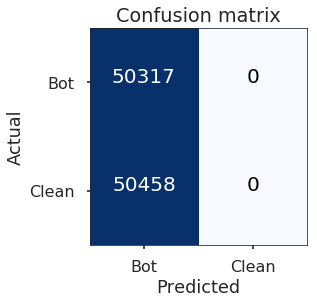

100775/100775 [==============================] - 3s 28us/sample - loss: 0.0181 - acc: 0.9974


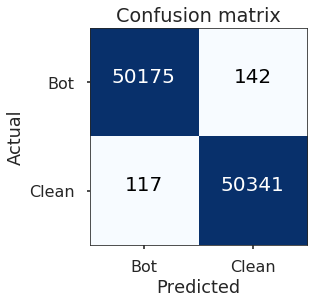

100775/100775 [==============================] - 3s 26us/sample - loss: 0.0225 - acc: 0.9966


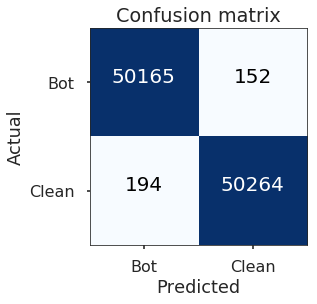

100775/100775 [==============================] - 3s 27us/sample - loss: 0.0140 - acc: 0.9966


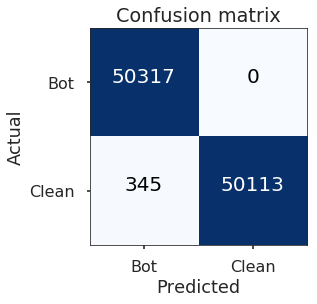

100775/100775 [==============================] - 3s 28us/sample - loss: 0.0141 - acc: 0.9979


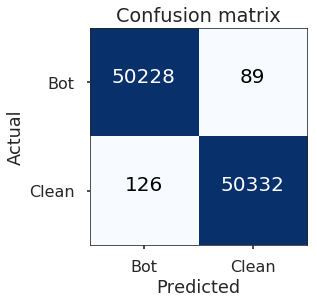

100775/100775 [==============================] - 3s 28us/sample - loss: 0.0142 - acc: 0.9978


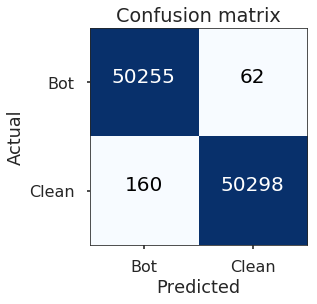

100775/100775 [==============================] - 3s 29us/sample - loss: 0.0089 - acc: 0.9982


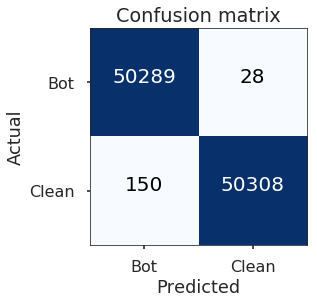

100775/100775 [==============================] - 3s 30us/sample - loss: 0.0074 - acc: 0.9984


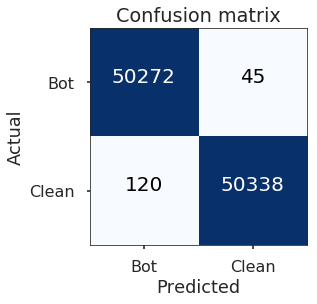

100775/100775 [==============================] - 3s 31us/sample - loss: 0.0089 - acc: 0.9983


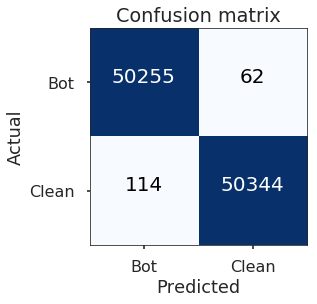

100775/100775 [==============================] - 3s 32us/sample - loss: 0.0038 - acc: 0.9989


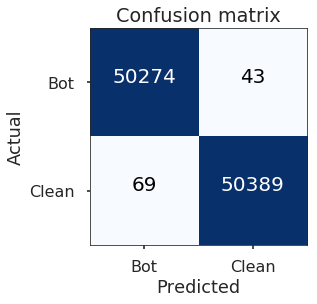

{1: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8fc278cc0>, 0.0, 1.0, 0.49930042173158024), 2: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8fbbb7908>, 0.9976812398430378, 0.9971778921636822, 0.9974299181344579), 3: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8f4416400>, 0.9961552182012763, 0.9969791521752092, 0.9965666087819399), 4: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8f35338d0>, 0.9931626303063934, 1.0, 0.9965765318779459), 8: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8f2eea0f0>, 0.9975028736771177, 0.9982312141025896, 0.99786653435872), 12: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8f699f390>, 0.996829045939197, 0.9987678120714669, 0.9977970726866783), 16: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8f25f6048>, 0.9970272305679971, 0.9994435280322753, 0.9982336889109402), 32: (<tensorflow.pytho

In [0]:
#Layer - I


layer_depth_linear = [1,2,3,4,8,12,16,32,64,128]
layer_depth = [2,4,8,12,16,24,32]

accuracy=[]

lcv=0

result= {}

for i in layer_depth_linear:
  model = Sequential()

  model.add(Dense(units=i, activation='sigmoid'))
  model.add(Dense(units=32, activation='sigmoid'))
  model.add(Dense(units=32, activation='sigmoid'))
  model.add(Dense(units=2, activation='softmax'))


  model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


  model.fit(x_train, y_train, epochs=1)
  loss_and_metrics = model.evaluate(x_test, y_test)
  classes = model.predict(x_test)
  #print(classes)

  y_pred = np.argmax(classes,axis=1)
  #print(y_pred)


  TN, FP, FN, TP = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()

  

  correct_predictions = TN+TP
  total_predictions = TN+FN+TP+FP
  accuracy = correct_predictions/total_predictions
  
  result[i] = ((model,TP/(TP+FN),TN/(TN+FP) ,accuracy))
  
  #print("Sensitivity: ", TP/(TP+FN))
  #print("Specificity: ", TN/(TN+FP))
  #print("Accuracy: ", accuracy)


  cm = confusion_matrix(y_test, y_pred)
  #print(cm)


  plot_confusion_matrix(cm, labelencoder_y.classes_)

print (result)


arr = []
ind1 = []
r1 = []
r2 = []
r3 = []

for items in result:
  ind1.append(items)
  r1.append (result[items][1])
  r2.append (result[items][2])
  r3.append (result[items][3])
  #print(items,,,)
#print(arr)




In [0]:
result_msg = "Sensitivity, Specificity, Accuracy \n"
for item in range(0,len(r1)):
  result_msg += str(r1[item]) + "," + str(r2[item]) + "," + str(r3[item]) +"\n"
  
print (result_msg)

Sensitivity, Specificity, Accuracy 
0.0,1.0,0.49930042173158024
0.9976812398430378,0.9971778921636822,0.9974299181344579
0.9961552182012763,0.9969791521752092,0.9965666087819399
0.9931626303063934,1.0,0.9965765318779459
0.9975028736771177,0.9982312141025896,0.99786653435872
0.996829045939197,0.9987678120714669,0.9977970726866783
0.9970272305679971,0.9994435280322753,0.9982336889109402
0.9976217844543978,0.9991056700518711,0.9983626891590176
0.9977406952316779,0.9987678120714669,0.9982535351029521
0.9986325260612787,0.9991454180495658,0.9988886132473331



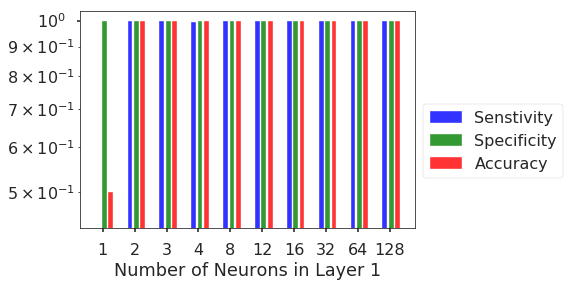

In [0]:

# data to plot
n_groups = len(result)
#means_frank = (90, 55, 40, 65)
#means_guido = (85, 62, 54, 20)
 
# create plot

fig = plt.figure()
#ax = plt.subplot(111)
#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, r1, bar_width,alpha=opacity,color='b',label='Senstivity',log=True)
 
rects2 = plt.bar(index + 0.20, r2, bar_width,alpha=opacity,color='g',label='Specificity',log=True)

rects3 = plt.bar(index + (2*0.20), r3, bar_width,alpha=opacity,color='r',label='Accuracy',log=True)

 
plt.xlabel('Number of Neurons in Layer 1')
#plt.ylabel('Scores')
#plt.title('Metrics')
plt.xticks(index + bar_width, ind1)
#plt.legend(loc=1)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.4))

plt.show()
#plt.tight_layout()
# Layerplt.show()

#Layer-II

100775/100775 [==============================] - 3s 32us/sample - loss: 0.0107 - acc: 0.9984


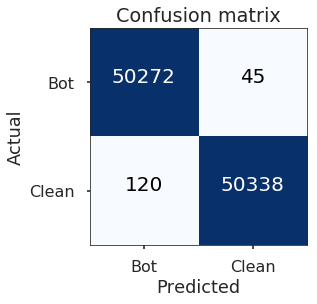

100775/100775 [==============================] - 3s 33us/sample - loss: 0.0104 - acc: 0.9973


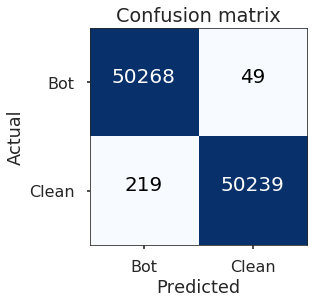

100775/100775 [==============================] - 3s 35us/sample - loss: 0.0090 - acc: 0.9980


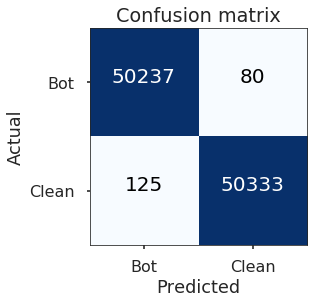

100775/100775 [==============================] - 3s 34us/sample - loss: 0.0099 - acc: 0.9981


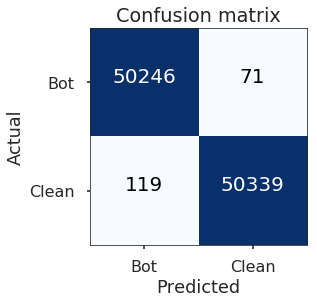

100775/100775 [==============================] - 3s 35us/sample - loss: 0.0098 - acc: 0.9984


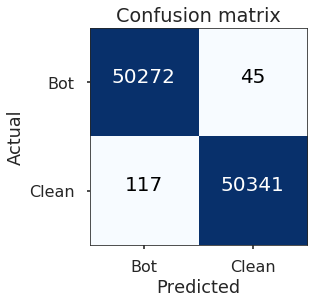

100775/100775 [==============================] - 4s 35us/sample - loss: 0.0079 - acc: 0.9983


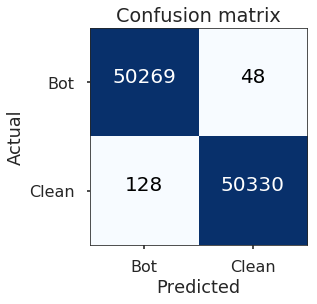

100775/100775 [==============================] - 4s 35us/sample - loss: 0.0102 - acc: 0.9984


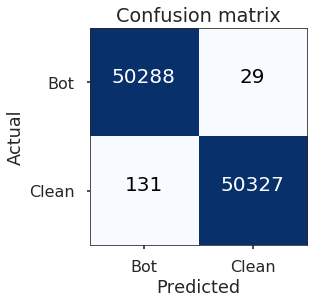

100775/100775 [==============================] - 4s 37us/sample - loss: 0.0115 - acc: 0.9975


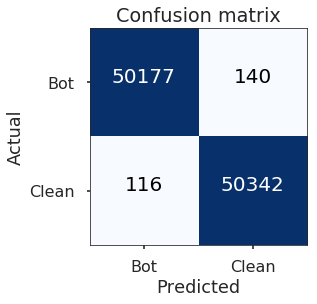

100775/100775 [==============================] - 4s 38us/sample - loss: 0.0094 - acc: 0.9981


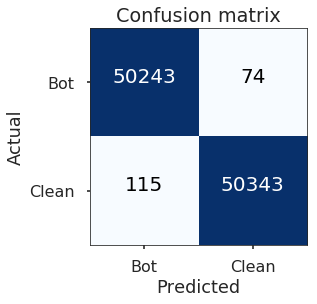

100775/100775 [==============================] - 8s 83us/sample - loss: 0.0338 - acc: 0.9949


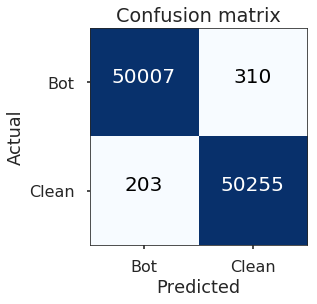

{1: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8f03090f0>, 0.9976217844543978, 0.9991056700518711, 0.9983626891590176), 2: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8f1199358>, 0.9956597566292759, 0.9990261740564819, 0.9973406102704043), 3: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8ef707fd0>, 0.9975226921399977, 0.9984100800922153, 0.9979657653187795), 4: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8f0372cf8>, 0.9976416029172778, 0.9985889460818411, 0.9981146117588687), 8: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8f05011d0>, 0.9976812398430378, 0.9991056700518711, 0.9983924584470355), 12: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8ee257a90>, 0.9974632367513576, 0.9990460480553293, 0.9982535351029521), 16: (<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa8edc450f0>, 0.9974037813627175, 0.99942365403342

In [0]:
# Layer -II




layer2_depth_linear = [1,2,3,4,8,12,16,32,64,128]

layer_depth = [2,4,8,12,16,24,32]

accuracy=[]

lcv=0

result2= {}

for i in layer2_depth_linear:
  model2 = Sequential()

  model2.add(Dense(units=32, activation='sigmoid'))
  model2.add(Dense(units=i, activation='sigmoid'))
  model2.add(Dense(units=32, activation='sigmoid'))
  model2.add(Dense(units=2, activation='softmax'))


  model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


  model2.fit(x_train, y_train, epochs=1)


  loss_and_metrics = model2.evaluate(x_test, y_test)


  classes = model2.predict(x_test)
  #print(classes)

  y_pred = np.argmax(classes,axis=1)
  #print(y_pred)


  TN, FP, FN, TP = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()

  

  correct_predictions = TN+TP
  total_predictions = TN+FN+TP+FP
  accuracy = correct_predictions/total_predictions
  #result["sensitivity"][i] = TP/(TP+FN)
  #result["Specificity"][i] = TN/(TN+FP)
  result2[i] = ((model2,TP/(TP+FN),TN/(TN+FP) ,accuracy))
  
  #print("Sensitivity: ", TP/(TP+FN))
  #print("Specificity: ", TN/(TN+FP))
  #print("Accuracy: ", accuracy)


  cm = confusion_matrix(y_test, y_pred)
  #print(cm)


  plot_confusion_matrix(cm, labelencoder_y.classes_)

print (result2)




l2ind1 = []
l2r1 = []
l2r2 = []
l2r3 = []

for items in result2:
  l2ind1.append(items)
  l2r1.append (result2[items][1])
  l2r2.append (result2[items][2])
  l2r3.append (result2[items][3])
  #print(items,,,)
#print(arr)



In [0]:
l2result_msg = "Sensitivity, Specificity, Accuracy \n"
for item in range(0,len(l2r1)):
  l2result_msg += str(l2r1[item]) + "," + str(l2r2[item]) + "," + str(l2r3[item]) +"\n"
  
print (l2result_msg)

Sensitivity, Specificity, Accuracy 
0.9976217844543978,0.9991056700518711,0.9983626891590176
0.9956597566292759,0.9990261740564819,0.9973406102704043
0.9975226921399977,0.9984100800922153,0.9979657653187795
0.9976416029172778,0.9985889460818411,0.9981146117588687
0.9976812398430378,0.9991056700518711,0.9983924584470355
0.9974632367513576,0.9990460480553293,0.9982535351029521
0.9974037813627175,0.999423654033428,0.9984123046390474
0.9977010583059178,0.9972176401613768,0.9974596874224758
0.9977208767687978,0.9985293240852992,0.9981245348548747
0.9959768520353561,0.9938390603573345,0.9949094517489456



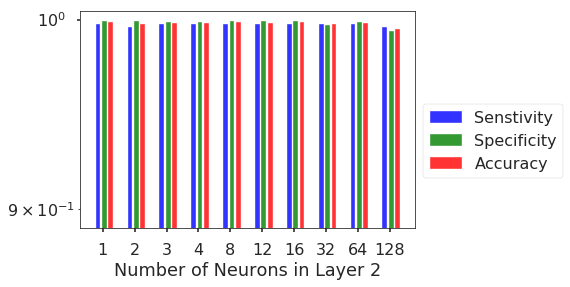

In [0]:

# data to plot
l2n_groups = len(result2)

 
# create plot

fig = plt.figure()

index = np.arange(l2n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, l2r1, bar_width,alpha=opacity,color='b',label='Senstivity',log=True)
 
rects2 = plt.bar(index + 0.20, l2r2, bar_width,alpha=opacity,color='g',label='Specificity',log=True)

rects3 = plt.bar(index + (2*0.20), l2r3, bar_width,alpha=opacity,color='r',label='Accuracy',log=True)

 
plt.xlabel('Number of Neurons in Layer 2')

plt.xticks(index + bar_width, l2ind1)



plt.legend(loc='center left', bbox_to_anchor=(1, 0.4))

plt.show()
